In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container {width: 90% !important; }</style>'))

In [2]:
import sys
sys.path.append("../../simpsom")
import simpsom as sps

import pandas as pd
import numpy as np

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
df = pd.DataFrame(digits.data, columns=digits.feature_names)
labels = digits.target
data = np.array(df)

In [8]:
def run_experiment(data, PBC=True, init='PCA', metric='euclidean', topology='hexagonal', 
               GPU=False, neighborhood_fun='gaussian', train_algo='batch', early_stop=None,
               plotall=False, size=10, epochs=10):

    net = sps.SOMNet(size, size, data, topology=topology, PBC=PBC, init=init, metric=metric, random_seed=32, GPU=GPU, debug=True)
    net.train(train_algo=train_algo, start_learning_rate=0.01, epochs=epochs, batch_size=-1, early_stop=early_stop)

    if plotall:

        net.plot_map_by_feature(feature=1, show=True, print_out=False)
        _ = net.plot_map_by_difference(show=True, print_out=False, returns=False)

        _ = net.plot_projected_points(net.project_onto_map(data), 
                                     project=False, jitter=True, 
                                     show=True, print_out=False)
        _ = net.plot_projected_points(data, color_val=[n.difference for n in net.nodes_list],
                                     project=True, jitter=True, 
                                     show=True, print_out=False)

        labs, points = net.cluster(data, algorithm='AgglomerativeClustering')
        net.plot_clusters(data, labs, project=True, show=True)
        labs, points = net.cluster(data, algorithm='DBSCAN')
        net.plot_clusters(data, labs, project=True, show=True)
        labs, points = net.cluster(data, algorithm='KMeans')
        net.plot_clusters(data, labs, project=True, show=True)

        net.plot_convergence(fsize=(5, 5), logax=False)

In [9]:
GPU=False

confs = [
{'PBC': False, 'init':'PCA', 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'cosine', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'manhattan', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':'random', 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':(np.array([[0,1]]*data.shape[1])).T, 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':None, 'plotall':False},
{'PBC': True, 'init':'PCA', 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'euclidean', 'topology':'square', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'mexican', 'train_algo':'online', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'bubble', 'train_algo':'online', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'batch', 'early_stop':None, 'plotall':False},
{'PBC': True, 'init':'PCA', 'metric':'euclidean', 'topology':'square', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':None, 'plotall':False},
{'PBC': True, 'init':'PCA', 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'batch', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'cosine', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'batch', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'manhattan', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'batch', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':'bmudiff', 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':'mapdiff', 'plotall':False}, 
{'PBC': True, 'init':'PCA', 'metric':'euclidean', 'topology':'square', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':None, 'plotall':True},
{'PBC': False, 'init':'PCA', 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'batch', 'early_stop':'mapdiff', 'plotall':True},
{'PBC': False, 'init':'PCA', 'metric':'euclidean', 'topology':'square', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':None, 'plotall':True},
]

2022-07-05 11:20:55.699 | INFO     | simpsom.network:__init__:114 - Hexagonal topology.
2022-07-05 11:20:55.701 | WARNING  | simpsom.network:_set_weights:174 - Please be sure that the data have been standardized before using PCA.
2022-07-05 11:20:55.701 | INFO     | simpsom.network:_set_weights:175 - The weights will be initialized with PCA.
2022-07-05 11:20:55.710 | INFO     | simpsom.network:train:365 - The map will be trained with the online algorithm.
2022-07-05 11:20:55.712 | WARNING  | simpsom.network:_randomize_dataset:270 - Epochs for online training are less than the input datapoints.
Training SOM... 0%5.713 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 10%.737 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 20%.757 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 30%.780 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 40%.801 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 50%.825 | DEBUG    | simpsom.network:train:393 - 
Tra

CPU
{'PBC': False, 'init': 'PCA', 'metric': 'euclidean', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'online', 'early_stop': None, 'plotall': False}


Training SOM... 90%.915 | DEBUG    | simpsom.network:train:393 - 
2022-07-05 11:20:55.938 | INFO     | simpsom.network:__init__:114 - Hexagonal topology.
2022-07-05 11:20:55.939 | WARNING  | simpsom.network:_set_weights:174 - Please be sure that the data have been standardized before using PCA.
2022-07-05 11:20:55.939 | INFO     | simpsom.network:_set_weights:175 - The weights will be initialized with PCA.
2022-07-05 11:20:55.945 | INFO     | simpsom.network:train:365 - The map will be trained with the online algorithm.
2022-07-05 11:20:55.946 | WARNING  | simpsom.network:_randomize_dataset:270 - Epochs for online training are less than the input datapoints.
Training SOM... 0%5.947 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 10%.971 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 20%.991 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 30%.010 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 40%.031 | DEBUG    | simpsom.network:train:393 - 
Tra

{'PBC': False, 'init': 'PCA', 'metric': 'cosine', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'online', 'early_stop': None, 'plotall': False}


2022-07-05 11:20:56.152 | INFO     | simpsom.network:__init__:114 - Hexagonal topology.
2022-07-05 11:20:56.153 | WARNING  | simpsom.network:_set_weights:174 - Please be sure that the data have been standardized before using PCA.
2022-07-05 11:20:56.153 | INFO     | simpsom.network:_set_weights:175 - The weights will be initialized with PCA.
2022-07-05 11:20:56.159 | INFO     | simpsom.network:train:365 - The map will be trained with the online algorithm.
2022-07-05 11:20:56.159 | WARNING  | simpsom.network:_randomize_dataset:270 - Epochs for online training are less than the input datapoints.
Training SOM... 0%6.160 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 10%.181 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 20%.203 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 30%.223 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 40%.244 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 50%.265 | DEBUG    | simpsom.network:train:393 - 
Tra

{'PBC': False, 'init': 'PCA', 'metric': 'manhattan', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'online', 'early_stop': None, 'plotall': False}


2022-07-05 11:20:56.366 | INFO     | simpsom.network:__init__:114 - Hexagonal topology.
2022-07-05 11:20:56.366 | INFO     | simpsom.network:_set_weights:186 - The weights will be initialized randomly.
2022-07-05 11:20:56.369 | INFO     | simpsom.network:train:365 - The map will be trained with the online algorithm.
2022-07-05 11:20:56.369 | WARNING  | simpsom.network:_randomize_dataset:270 - Epochs for online training are less than the input datapoints.
Training SOM... 0%6.370 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 10%.391 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 20%.411 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 30%.430 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 40%.450 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 50%.471 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 60%.492 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 70%.512 | DEBUG    | simpsom.network:train:393 - 
Training SOM.

{'PBC': False, 'init': 'random', 'metric': 'euclidean', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'online', 'early_stop': None, 'plotall': False}


2022-07-05 11:20:56.577 | INFO     | simpsom.network:__init__:114 - Hexagonal topology.
2022-07-05 11:20:56.577 | INFO     | simpsom.network:_set_weights:186 - The weights will be initialized randomly.
2022-07-05 11:20:56.580 | INFO     | simpsom.network:train:365 - The map will be trained with the online algorithm.
2022-07-05 11:20:56.581 | WARNING  | simpsom.network:_randomize_dataset:270 - Epochs for online training are less than the input datapoints.
Training SOM... 0%6.582 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 10%.603 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 20%.624 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 30%.644 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 40%.665 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 50%.686 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 60%.706 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 70%.726 | DEBUG    | simpsom.network:train:393 - 
Training SOM.

{'PBC': False, 'init': array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]), 'metric': 'euclidean', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'online', 'early_stop': None, 'plotall': False}


2022-07-05 11:20:56.787 | INFO     | simpsom.network:__init__:105 - Periodic Boundary Conditions active.
2022-07-05 11:20:56.788 | INFO     | simpsom.network:__init__:114 - Hexagonal topology.
2022-07-05 11:20:56.789 | WARNING  | simpsom.network:_set_weights:174 - Please be sure that the data have been standardized before using PCA.
2022-07-05 11:20:56.789 | INFO     | simpsom.network:_set_weights:175 - The weights will be initialized with PCA.
2022-07-05 11:20:56.795 | INFO     | simpsom.network:train:365 - The map will be trained with the online algorithm.
2022-07-05 11:20:56.796 | WARNING  | simpsom.network:_randomize_dataset:270 - Epochs for online training are less than the input datapoints.
Training SOM... 0%6.796 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 10%.915 | DEBUG    | simpsom.network:train:393 - 


{'PBC': True, 'init': 'PCA', 'metric': 'euclidean', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'online', 'early_stop': None, 'plotall': False}


Training SOM... 20%.033 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 30%.150 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 40%.269 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 50%.387 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 60%.503 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 70%.622 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 80%.740 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 90%.856 | DEBUG    | simpsom.network:train:393 - 
2022-07-05 11:20:57.972 | INFO     | simpsom.network:__init__:117 - Square topology.
2022-07-05 11:20:57.973 | WARNING  | simpsom.network:_set_weights:174 - Please be sure that the data have been standardized before using PCA.
2022-07-05 11:20:57.973 | INFO     | simpsom.network:_set_weights:175 - The weights will be initialized with PCA.
2022-07-05 11:20:57.978 | INFO     | simpsom.network:train:365 - The map will be trained with the online algorithm.
2022-07-05 11:2

{'PBC': False, 'init': 'PCA', 'metric': 'euclidean', 'topology': 'square', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'online', 'early_stop': None, 'plotall': False}
{'PBC': False, 'init': 'PCA', 'metric': 'euclidean', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'mexican', 'train_algo': 'online', 'early_stop': None, 'plotall': False}


2022-07-05 11:20:58.173 | WARNING  | simpsom.network:_set_weights:174 - Please be sure that the data have been standardized before using PCA.
2022-07-05 11:20:58.174 | INFO     | simpsom.network:_set_weights:175 - The weights will be initialized with PCA.
2022-07-05 11:20:58.179 | INFO     | simpsom.network:train:365 - The map will be trained with the online algorithm.
2022-07-05 11:20:58.180 | WARNING  | simpsom.network:_randomize_dataset:270 - Epochs for online training are less than the input datapoints.
Training SOM... 0%8.181 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 10%.204 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 20%.225 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 30%.246 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 40%.267 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 50%.288 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 60%.308 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 70%.328 |

{'PBC': False, 'init': 'PCA', 'metric': 'euclidean', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'bubble', 'train_algo': 'online', 'early_stop': None, 'plotall': False}


2022-07-05 11:20:58.612 | INFO     | simpsom.network:__init__:114 - Hexagonal topology.
2022-07-05 11:20:58.613 | WARNING  | simpsom.network:_set_weights:174 - Please be sure that the data have been standardized before using PCA.
2022-07-05 11:20:58.613 | INFO     | simpsom.network:_set_weights:175 - The weights will be initialized with PCA.
2022-07-05 11:20:58.619 | INFO     | simpsom.network:train:365 - The map will be trained with the batch algorithm.
Training SOM... 0%8.620 | DEBUG    | simpsom.network:train:465 - 


{'PBC': False, 'init': 'PCA', 'metric': 'euclidean', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'batch', 'early_stop': None, 'plotall': False}


Training SOM... 10%.197 | DEBUG    | simpsom.network:train:465 - 
Training SOM... 20%.749 | DEBUG    | simpsom.network:train:465 - 
Training SOM... 30%.292 | DEBUG    | simpsom.network:train:465 - 
Training SOM... 40%.839 | DEBUG    | simpsom.network:train:465 - 
Training SOM... 50%.380 | DEBUG    | simpsom.network:train:465 - 
Training SOM... 60%.926 | DEBUG    | simpsom.network:train:465 - 
Training SOM... 70%.478 | DEBUG    | simpsom.network:train:465 - 
Training SOM... 80%.023 | DEBUG    | simpsom.network:train:465 - 
Training SOM... 90%.566 | DEBUG    | simpsom.network:train:465 - 
2022-07-05 11:21:04.116 | INFO     | simpsom.network:__init__:105 - Periodic Boundary Conditions active.
2022-07-05 11:21:04.116 | INFO     | simpsom.network:__init__:117 - Square topology.
2022-07-05 11:21:04.117 | WARNING  | simpsom.network:_set_weights:174 - Please be sure that the data have been standardized before using PCA.
2022-07-05 11:21:04.118 | INFO     | simpsom.network:_set_weights:175 - Th

{'PBC': True, 'init': 'PCA', 'metric': 'euclidean', 'topology': 'square', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'online', 'early_stop': None, 'plotall': False}


Training SOM... 20%.321 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 30%.421 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 40%.519 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 50%.615 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 60%.714 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 70%.811 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 80%.910 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 90%.015 | DEBUG    | simpsom.network:train:393 - 
2022-07-05 11:21:05.119 | INFO     | simpsom.network:__init__:105 - Periodic Boundary Conditions active.
2022-07-05 11:21:05.120 | INFO     | simpsom.network:__init__:114 - Hexagonal topology.
2022-07-05 11:21:05.121 | WARNING  | simpsom.network:_set_weights:174 - Please be sure that the data have been standardized before using PCA.
2022-07-05 11:21:05.122 | INFO     | simpsom.network:_set_weights:175 - The weights will be initialized with PCA.
2022-07-05 11:21:05.127

{'PBC': True, 'init': 'PCA', 'metric': 'euclidean', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'batch', 'early_stop': None, 'plotall': False}


Training SOM... 10%.703 | DEBUG    | simpsom.network:train:465 - 
Training SOM... 20%.268 | DEBUG    | simpsom.network:train:465 - 
Training SOM... 30%.829 | DEBUG    | simpsom.network:train:465 - 
Training SOM... 40%.383 | DEBUG    | simpsom.network:train:465 - 
Training SOM... 50%.992 | DEBUG    | simpsom.network:train:465 - 
Training SOM... 60%.570 | DEBUG    | simpsom.network:train:465 - 
Training SOM... 70%.143 | DEBUG    | simpsom.network:train:465 - 
Training SOM... 80%.700 | DEBUG    | simpsom.network:train:465 - 
Training SOM... 90%.283 | DEBUG    | simpsom.network:train:465 - 
2022-07-05 11:21:10.857 | INFO     | simpsom.network:__init__:114 - Hexagonal topology.
2022-07-05 11:21:10.858 | WARNING  | simpsom.network:_set_weights:174 - Please be sure that the data have been standardized before using PCA.
2022-07-05 11:21:10.858 | INFO     | simpsom.network:_set_weights:175 - The weights will be initialized with PCA.
2022-07-05 11:21:10.863 | INFO     | simpsom.network:train:365

{'PBC': False, 'init': 'PCA', 'metric': 'cosine', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'batch', 'early_stop': None, 'plotall': False}


Training SOM... 10%.439 | DEBUG    | simpsom.network:train:465 - 
Training SOM... 20%.005 | DEBUG    | simpsom.network:train:465 - 
Training SOM... 30%.565 | DEBUG    | simpsom.network:train:465 - 
Training SOM... 40%.150 | DEBUG    | simpsom.network:train:465 - 
Training SOM... 50%.714 | DEBUG    | simpsom.network:train:465 - 
Training SOM... 60%.262 | DEBUG    | simpsom.network:train:465 - 
Training SOM... 70%.841 | DEBUG    | simpsom.network:train:465 - 
Training SOM... 80%.422 | DEBUG    | simpsom.network:train:465 - 
Training SOM... 90%.029 | DEBUG    | simpsom.network:train:465 - 
2022-07-05 11:21:16.620 | INFO     | simpsom.network:__init__:114 - Hexagonal topology.
2022-07-05 11:21:16.621 | WARNING  | simpsom.network:_set_weights:174 - Please be sure that the data have been standardized before using PCA.
2022-07-05 11:21:16.622 | INFO     | simpsom.network:_set_weights:175 - The weights will be initialized with PCA.
2022-07-05 11:21:16.626 | INFO     | simpsom.network:train:365

{'PBC': False, 'init': 'PCA', 'metric': 'manhattan', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'batch', 'early_stop': None, 'plotall': False}


Training SOM... 10%.026 | DEBUG    | simpsom.network:train:465 - 
Training SOM... 20%.456 | DEBUG    | simpsom.network:train:465 - 
Training SOM... 30%.913 | DEBUG    | simpsom.network:train:465 - 
Training SOM... 40%.298 | DEBUG    | simpsom.network:train:465 - 
Training SOM... 50%.687 | DEBUG    | simpsom.network:train:465 - 
Training SOM... 60%.096 | DEBUG    | simpsom.network:train:465 - 
Training SOM... 70%.502 | DEBUG    | simpsom.network:train:465 - 
Training SOM... 80%.892 | DEBUG    | simpsom.network:train:465 - 
Training SOM... 90%.299 | DEBUG    | simpsom.network:train:465 - 
2022-07-05 11:21:20.735 | INFO     | simpsom.network:__init__:114 - Hexagonal topology.
2022-07-05 11:21:20.735 | WARNING  | simpsom.network:_set_weights:174 - Please be sure that the data have been standardized before using PCA.
2022-07-05 11:21:20.736 | INFO     | simpsom.network:_set_weights:175 - The weights will be initialized with PCA.
2022-07-05 11:21:20.743 | INFO     | simpsom.network:train:365

{'PBC': False, 'init': 'PCA', 'metric': 'euclidean', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'online', 'early_stop': 'bmudiff', 'plotall': False}


Training SOM... 90%.939 | DEBUG    | simpsom.network:train:393 - 
2022-07-05 11:21:20.959 | INFO     | simpsom.network:__init__:114 - Hexagonal topology.
2022-07-05 11:21:20.960 | WARNING  | simpsom.network:_set_weights:174 - Please be sure that the data have been standardized before using PCA.
2022-07-05 11:21:20.960 | INFO     | simpsom.network:_set_weights:175 - The weights will be initialized with PCA.
2022-07-05 11:21:20.966 | INFO     | simpsom.network:train:365 - The map will be trained with the online algorithm.
2022-07-05 11:21:20.967 | WARNING  | simpsom.network:_randomize_dataset:270 - Epochs for online training are less than the input datapoints.
Training SOM... 0%0.968 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 10%.989 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 20%.011 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 30%.031 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 40%.051 | DEBUG    | simpsom.network:train:393 - 
Tra

{'PBC': False, 'init': 'PCA', 'metric': 'euclidean', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'online', 'early_stop': 'mapdiff', 'plotall': False}


2022-07-05 11:21:21.178 | INFO     | simpsom.network:__init__:105 - Periodic Boundary Conditions active.
2022-07-05 11:21:21.179 | INFO     | simpsom.network:__init__:117 - Square topology.
2022-07-05 11:21:21.179 | WARNING  | simpsom.network:_set_weights:174 - Please be sure that the data have been standardized before using PCA.
2022-07-05 11:21:21.180 | INFO     | simpsom.network:_set_weights:175 - The weights will be initialized with PCA.
2022-07-05 11:21:21.186 | INFO     | simpsom.network:train:365 - The map will be trained with the online algorithm.
2022-07-05 11:21:21.187 | WARNING  | simpsom.network:_randomize_dataset:270 - Epochs for online training are less than the input datapoints.
Training SOM... 0%1.188 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 10%.292 | DEBUG    | simpsom.network:train:393 - 


{'PBC': True, 'init': 'PCA', 'metric': 'euclidean', 'topology': 'square', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'online', 'early_stop': None, 'plotall': True}


Training SOM... 20%.390 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 30%.498 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 40%.596 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 50%.695 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 60%.795 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 70%.899 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 80%.995 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 90%.098 | DEBUG    | simpsom.network:train:393 - 


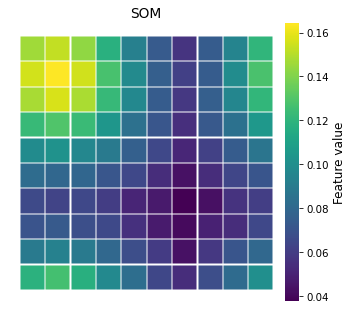

2022-07-05 11:21:23.251 | INFO     | simpsom.network:get_nodes_difference:555 - Weights difference among neighboring nodes calculated.


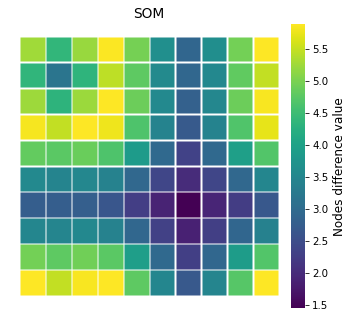

2022-07-05 11:21:23.469 | INFO     | simpsom.network:project_onto_map:582 - Projected coordinates will be saved to:
././som_projected.npy
2022-07-05 11:21:23.472 | ERROR    | simpsom.network:plot_projected_points:798 - [[1 8]
 [1 8]
 [1 8]
 ...
 [1 8]
 [1 8]
 [1 8]]


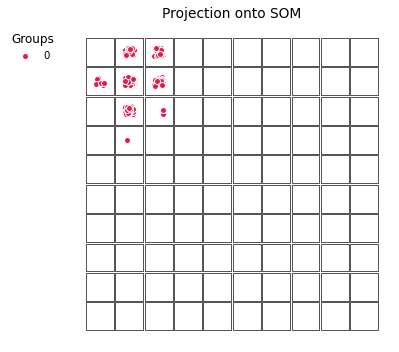

2022-07-05 11:21:23.585 | INFO     | simpsom.network:project_onto_map:582 - Projected coordinates will be saved to:
././som_projected.npy
2022-07-05 11:21:23.587 | ERROR    | simpsom.network:plot_projected_points:798 - [[1 8]
 [1 8]
 [1 8]
 ...
 [1 8]
 [1 8]
 [1 8]]


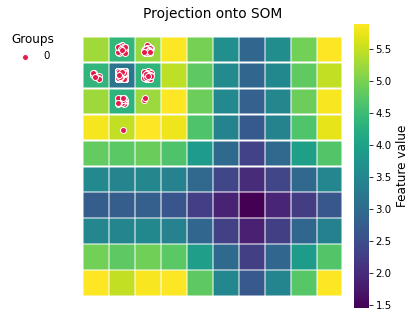

2022-07-05 11:21:23.772 | INFO     | simpsom.network:project_onto_map:582 - Projected coordinates will be saved to:
././som_projected.npy
2022-07-05 11:21:23.774 | WARNING  | simpsom.network:cluster:615 - PBC are not implemented with clustering yet and will be ignored for now.
2022-07-05 11:21:23.827 | INFO     | simpsom.network:cluster:654 - Clustering results will be saved to:
././som_clusters.npy
2022-07-05 11:21:23.832 | INFO     | simpsom.network:project_onto_map:582 - Projected coordinates will be saved to:
././som_projected.npy
/Users/federico comitani/GitHub/simpsom/simpsom/polygons.py:82: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_bad(color="#ffffff", alpha=1.)


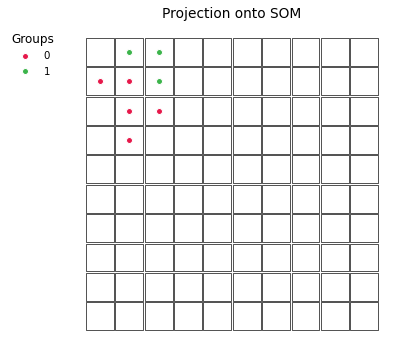

2022-07-05 11:21:24.267 | INFO     | simpsom.network:plot_clusters:859 - Clustering plot will be saved to:
././som_clustering.png
2022-07-05 11:21:24.271 | INFO     | simpsom.network:project_onto_map:582 - Projected coordinates will be saved to:
././som_projected.npy
2022-07-05 11:21:24.274 | WARNING  | simpsom.network:cluster:615 - PBC are not implemented with clustering yet and will be ignored for now.
2022-07-05 11:21:24.318 | INFO     | simpsom.network:cluster:654 - Clustering results will be saved to:
././som_clusters.npy
2022-07-05 11:21:24.324 | INFO     | simpsom.network:project_onto_map:582 - Projected coordinates will be saved to:
././som_projected.npy
/Users/federico comitani/GitHub/simpsom/simpsom/polygons.py:82: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap fi

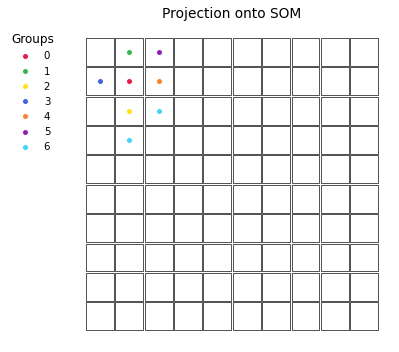

2022-07-05 11:21:24.984 | INFO     | simpsom.network:plot_clusters:859 - Clustering plot will be saved to:
././som_clustering.png
2022-07-05 11:21:24.989 | INFO     | simpsom.network:project_onto_map:582 - Projected coordinates will be saved to:
././som_projected.npy
2022-07-05 11:21:24.992 | WARNING  | simpsom.network:cluster:615 - PBC are not implemented with clustering yet and will be ignored for now.
2022-07-05 11:21:25.032 | INFO     | simpsom.network:cluster:654 - Clustering results will be saved to:
././som_clusters.npy
2022-07-05 11:21:25.038 | INFO     | simpsom.network:project_onto_map:582 - Projected coordinates will be saved to:
././som_projected.npy
/Users/federico comitani/GitHub/simpsom/simpsom/polygons.py:82: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap fi

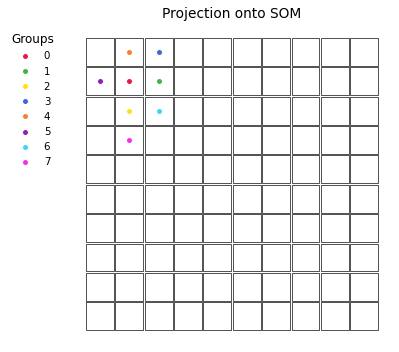

2022-07-05 11:21:25.772 | INFO     | simpsom.network:plot_clusters:859 - Clustering plot will be saved to:
././som_clustering.png
2022-07-05 11:21:25.773 | WARNING  | simpsom.network:plot_convergence:746 - The current parameters yelded no convergence. The plot will not be produced.
2022-07-05 11:21:25.773 | INFO     | simpsom.network:plot_convergence:766 - Convergence results will be saved to:
././som_convergence.png
2022-07-05 11:21:25.775 | INFO     | simpsom.network:__init__:114 - Hexagonal topology.
2022-07-05 11:21:25.776 | WARNING  | simpsom.network:_set_weights:174 - Please be sure that the data have been standardized before using PCA.
2022-07-05 11:21:25.777 | INFO     | simpsom.network:_set_weights:175 - The weights will be initialized with PCA.
2022-07-05 11:21:25.783 | INFO     | simpsom.network:train:365 - The map will be trained with the batch algorithm.
Training SOM... 0%5.785 | DEBUG    | simpsom.network:train:465 - 


{'PBC': False, 'init': 'PCA', 'metric': 'euclidean', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'batch', 'early_stop': 'mapdiff', 'plotall': True}


Early stop tolerance reached at epoch 4, stopping training.458 - 


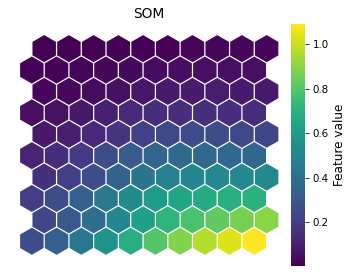

2022-07-05 11:21:26.341 | INFO     | simpsom.network:get_nodes_difference:555 - Weights difference among neighboring nodes calculated.


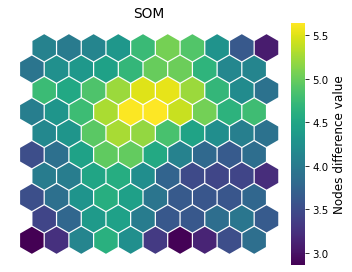

2022-07-05 11:21:26.487 | INFO     | simpsom.network:project_onto_map:582 - Projected coordinates will be saved to:
././som_projected.npy
2022-07-05 11:21:26.490 | ERROR    | simpsom.network:plot_projected_points:798 - [[9.        5.196152 ]
 [0.        5.196152 ]
 [0.        5.196152 ]
 ...
 [1.5       4.3301272]
 [6.        5.196152 ]
 [4.5       4.3301272]]


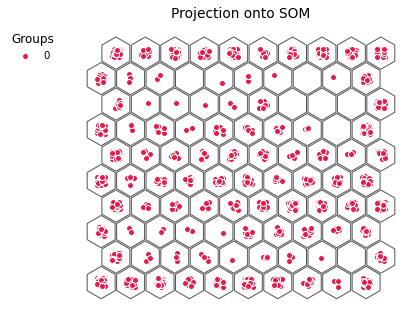

2022-07-05 11:21:26.622 | INFO     | simpsom.network:project_onto_map:582 - Projected coordinates will be saved to:
././som_projected.npy
2022-07-05 11:21:26.625 | ERROR    | simpsom.network:plot_projected_points:798 - [[9.        5.196152 ]
 [0.        5.196152 ]
 [0.        5.196152 ]
 ...
 [1.5       4.3301272]
 [6.        5.196152 ]
 [4.5       4.3301272]]


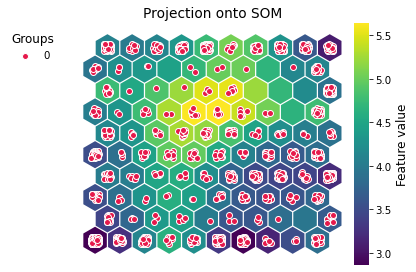

2022-07-05 11:21:26.817 | INFO     | simpsom.network:project_onto_map:582 - Projected coordinates will be saved to:
././som_projected.npy
2022-07-05 11:21:26.878 | INFO     | simpsom.network:cluster:654 - Clustering results will be saved to:
././som_clusters.npy
2022-07-05 11:21:26.884 | INFO     | simpsom.network:project_onto_map:582 - Projected coordinates will be saved to:
././som_projected.npy
/Users/federico comitani/GitHub/simpsom/simpsom/polygons.py:82: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_bad(color="#ffffff", alpha=1.)


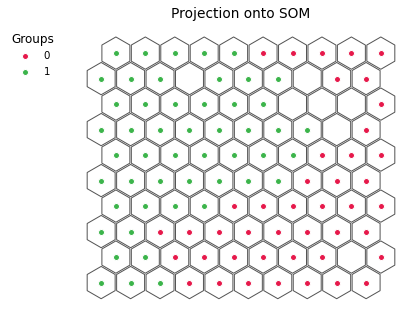

2022-07-05 11:21:27.515 | INFO     | simpsom.network:plot_clusters:859 - Clustering plot will be saved to:
././som_clustering.png
2022-07-05 11:21:27.521 | INFO     | simpsom.network:project_onto_map:582 - Projected coordinates will be saved to:
././som_projected.npy
2022-07-05 11:21:27.533 | INFO     | simpsom.network:cluster:654 - Clustering results will be saved to:
././som_clusters.npy
2022-07-05 11:21:27.539 | INFO     | simpsom.network:project_onto_map:582 - Projected coordinates will be saved to:
././som_projected.npy
/Users/federico comitani/GitHub/simpsom/simpsom/polygons.py:82: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_bad(color="#ffffff", alpha=1.)


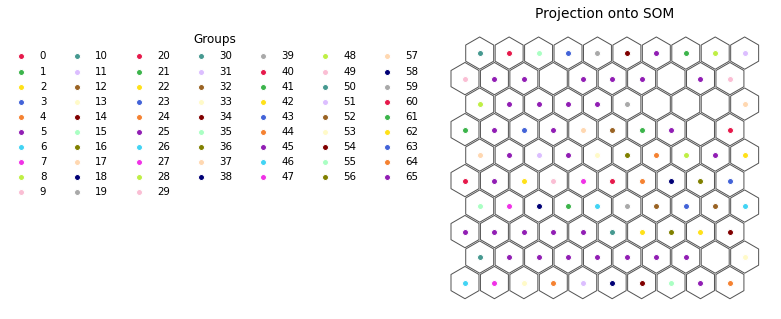

2022-07-05 11:21:31.198 | INFO     | simpsom.network:plot_clusters:859 - Clustering plot will be saved to:
././som_clustering.png
2022-07-05 11:21:31.206 | INFO     | simpsom.network:project_onto_map:582 - Projected coordinates will be saved to:
././som_projected.npy
2022-07-05 11:21:31.274 | INFO     | simpsom.network:cluster:654 - Clustering results will be saved to:
././som_clusters.npy
2022-07-05 11:21:31.280 | INFO     | simpsom.network:project_onto_map:582 - Projected coordinates will be saved to:
././som_projected.npy
/Users/federico comitani/GitHub/simpsom/simpsom/polygons.py:82: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_bad(color="#ffffff", alpha=1.)


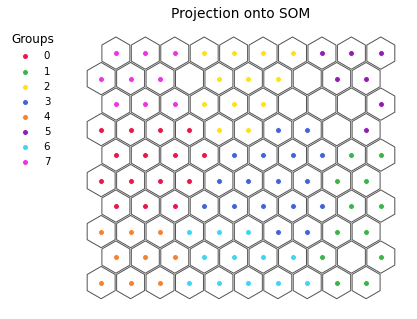

2022-07-05 11:21:32.083 | INFO     | simpsom.network:plot_clusters:859 - Clustering plot will be saved to:
././som_clustering.png
2022-07-05 11:21:32.439 | INFO     | simpsom.network:plot_convergence:766 - Convergence results will be saved to:
././som_convergence.png
2022-07-05 11:21:32.440 | INFO     | simpsom.network:__init__:117 - Square topology.
2022-07-05 11:21:32.441 | WARNING  | simpsom.network:_set_weights:174 - Please be sure that the data have been standardized before using PCA.
2022-07-05 11:21:32.441 | INFO     | simpsom.network:_set_weights:175 - The weights will be initialized with PCA.
2022-07-05 11:21:32.447 | INFO     | simpsom.network:train:365 - The map will be trained with the online algorithm.
2022-07-05 11:21:32.448 | WARNING  | simpsom.network:_randomize_dataset:270 - Epochs for online training are less than the input datapoints.
Training SOM... 0%2.449 | DEBUG    | simpsom.network:train:393 - 
Training SOM... 10%.469 | DEBUG    | simpsom.network:train:393 - 
Tr

{'PBC': False, 'init': 'PCA', 'metric': 'euclidean', 'topology': 'square', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'online', 'early_stop': None, 'plotall': True}


/Users/federico comitani/GitHub/simpsom/simpsom/polygons.py:82: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_bad(color="#ffffff", alpha=1.)


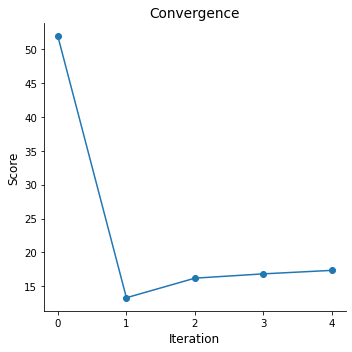

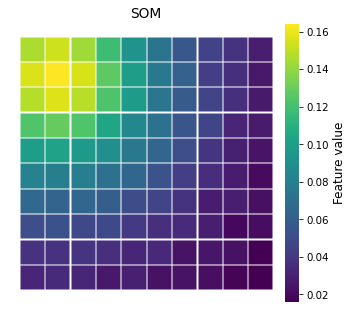

2022-07-05 11:21:32.964 | INFO     | simpsom.network:get_nodes_difference:555 - Weights difference among neighboring nodes calculated.


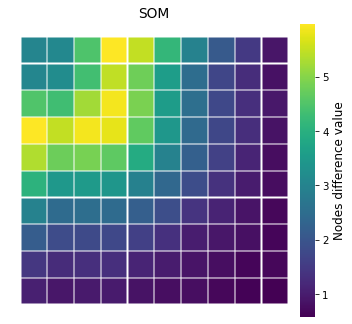

2022-07-05 11:21:33.098 | INFO     | simpsom.network:project_onto_map:582 - Projected coordinates will be saved to:
././som_projected.npy
2022-07-05 11:21:33.101 | ERROR    | simpsom.network:plot_projected_points:798 - [[1 8]
 [1 8]
 [1 8]
 ...
 [1 8]
 [1 8]
 [1 8]]


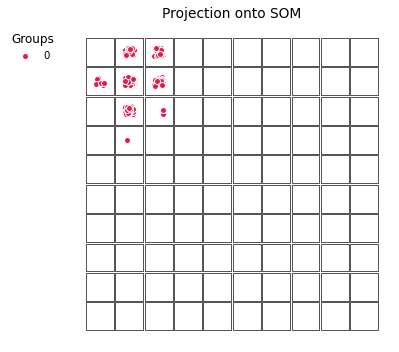

2022-07-05 11:21:33.209 | INFO     | simpsom.network:project_onto_map:582 - Projected coordinates will be saved to:
././som_projected.npy
2022-07-05 11:21:33.211 | ERROR    | simpsom.network:plot_projected_points:798 - [[1 8]
 [1 8]
 [1 8]
 ...
 [1 8]
 [1 8]
 [1 8]]


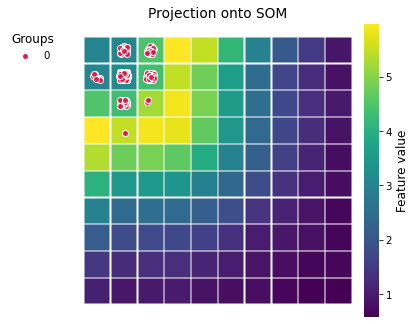

2022-07-05 11:21:33.379 | INFO     | simpsom.network:project_onto_map:582 - Projected coordinates will be saved to:
././som_projected.npy
2022-07-05 11:21:33.433 | INFO     | simpsom.network:cluster:654 - Clustering results will be saved to:
././som_clusters.npy
2022-07-05 11:21:33.438 | INFO     | simpsom.network:project_onto_map:582 - Projected coordinates will be saved to:
././som_projected.npy
/Users/federico comitani/GitHub/simpsom/simpsom/polygons.py:82: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_bad(color="#ffffff", alpha=1.)


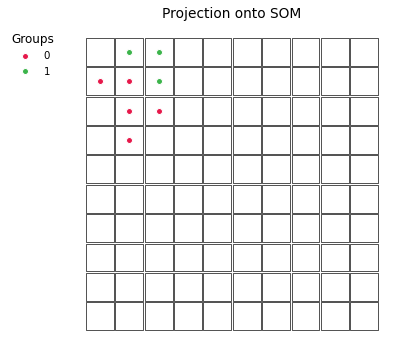

2022-07-05 11:21:33.870 | INFO     | simpsom.network:plot_clusters:859 - Clustering plot will be saved to:
././som_clustering.png
2022-07-05 11:21:33.875 | INFO     | simpsom.network:project_onto_map:582 - Projected coordinates will be saved to:
././som_projected.npy
2022-07-05 11:21:33.919 | INFO     | simpsom.network:cluster:654 - Clustering results will be saved to:
././som_clusters.npy
2022-07-05 11:21:33.924 | INFO     | simpsom.network:project_onto_map:582 - Projected coordinates will be saved to:
././som_projected.npy
/Users/federico comitani/GitHub/simpsom/simpsom/polygons.py:82: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_bad(color="#ffffff", alpha=1.)


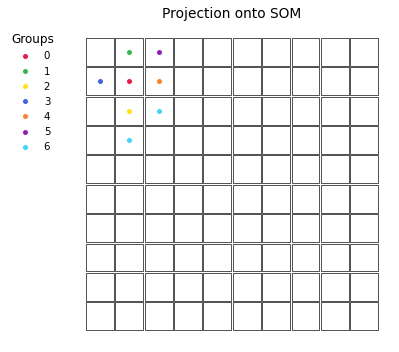

2022-07-05 11:21:34.614 | INFO     | simpsom.network:plot_clusters:859 - Clustering plot will be saved to:
././som_clustering.png
2022-07-05 11:21:34.620 | INFO     | simpsom.network:project_onto_map:582 - Projected coordinates will be saved to:
././som_projected.npy
2022-07-05 11:21:34.660 | INFO     | simpsom.network:cluster:654 - Clustering results will be saved to:
././som_clusters.npy
2022-07-05 11:21:34.666 | INFO     | simpsom.network:project_onto_map:582 - Projected coordinates will be saved to:
././som_projected.npy
/Users/federico comitani/GitHub/simpsom/simpsom/polygons.py:82: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("viridis").copy()
  cmap.set_bad(color="#ffffff", alpha=1.)


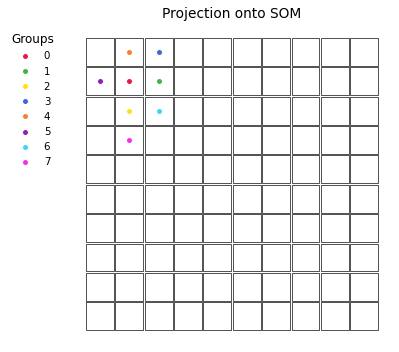

2022-07-05 11:21:35.376 | INFO     | simpsom.network:plot_clusters:859 - Clustering plot will be saved to:
././som_clustering.png
2022-07-05 11:21:35.376 | WARNING  | simpsom.network:plot_convergence:746 - The current parameters yelded no convergence. The plot will not be produced.
2022-07-05 11:21:35.377 | INFO     | simpsom.network:plot_convergence:766 - Convergence results will be saved to:
././som_convergence.png


All CPU tests done!


In [10]:
print('CPU')
for conf in confs:
    print(conf)
    run_experiment(data, **conf)
print('All CPU tests done!')

In [7]:
try:
    import cupy
    print('GPU')
    for conf in confs:
        print(conf)
        conf['GPU']=True
        run_experiment(data, **conf)
    print('All GPU tests done!')
except ImportError:
    print('No CuPy found, GPU tests will be skipped')

No CuPy found, GPU tests will be skipped
